In [570]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

In [571]:
import os
DATA_PATH = "Dane/USA/SP_500.csv"

In [572]:
data_stock = pd.read_csv(DATA_PATH, sep=",")

In [573]:
data_stock.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-30,1316.16,1316.16,1300.49,1313.01,2032783333
1,2012-01-31,1313.53,1321.41,1306.69,1312.41,2353083333
2,2012-02-01,1312.45,1330.52,1312.45,1324.09,2502422222
3,2012-02-02,1324.24,1329.19,1321.57,1325.54,2289400000
4,2012-02-03,1326.21,1345.34,1326.21,1344.90,2560305556


In [574]:
data_stock.describe()

,Open,High,Low,Close,Volume
count,1592.000000,1592.000000,1592.000000,1592.000000,1.592000e+03
mean,1983.254391,1991.843769,1974.077142,1983.754906,1.973925e+09
std,385.776016,386.468906,384.702618,385.463489,3.629619e+08
min,1277.820000,1282.550000,1266.740000,1278.040000,6.938667e+08
25%,1687.297500,1692.052500,1681.657500,1688.845000,1.762729e+09
50%,2018.305000,2026.790000,2005.280000,2019.180000,1.935067e+09
75%,2177.872500,2183.827500,2171.437500,2180.080000,2.129876e+09
max,2867.230000,2872.870000,2851.480000,2872.870000,4.220806e+09


In [575]:
data_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1592 non-null   object 
 1   Open    1592 non-null   float64
 2   High    1592 non-null   float64
 3   Low     1592 non-null   float64
 4   Close   1592 non-null   float64
 5   Volume  1592 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 74.8+ KB


# Wykresy

Zróbmy wykres CLOSE w zależności od czasu

In [576]:
import matplotlib.pyplot as plt

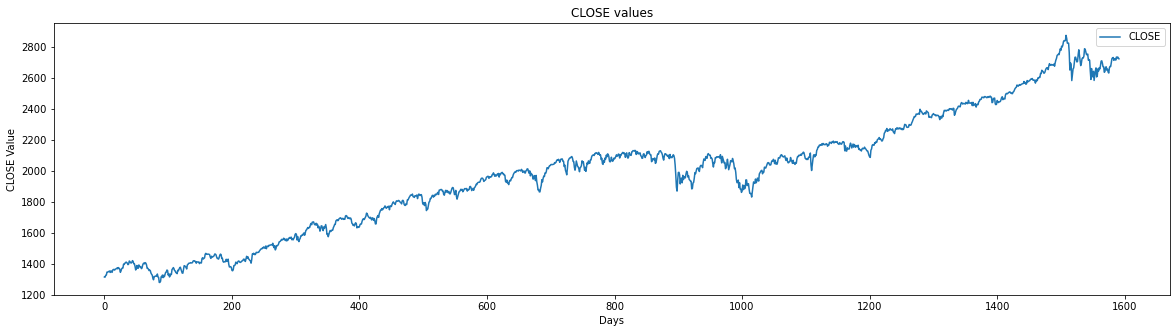

In [577]:
plt.subplots(figsize = (20, 5))
plt.plot(data_stock['Close'], label = 'CLOSE')
# plt.ylim([-0.004, 0.004])
# plt.xlim([0, 1660])
plt.ylabel('CLOSE Value')
plt.xlabel('Days')
plt.title('CLOSE values')
plt.legend()
plt.show()

Spójrzmy na wycinek dzienny (7 dni)

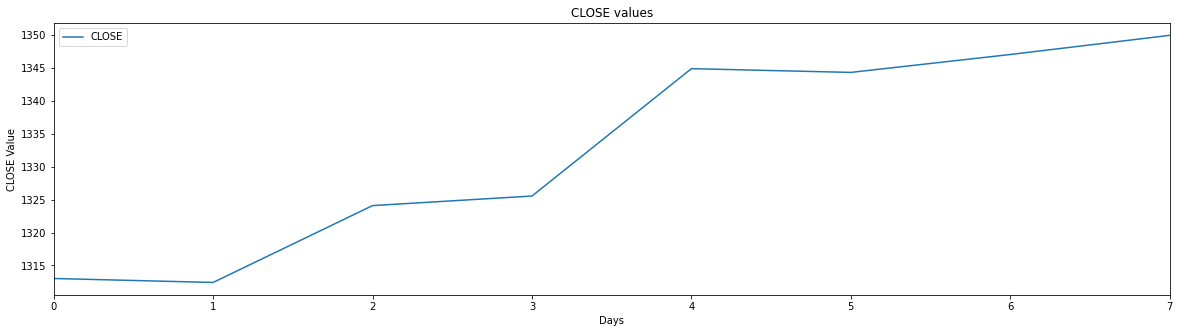

In [578]:
plt.subplots(figsize = (20, 5))
plt.plot(data_stock['Close'][:8], label = 'CLOSE')
plt.xlim([0, 7])
plt.ylabel('CLOSE Value')
plt.xlabel('Days')
plt.title('CLOSE values')
plt.legend()
plt.show()

# Podzielenie danych na X i y

Będziemy próbowali przewidzieć wartość CLOSE

Spróbujemy to zrobić wykorzystując **n poprzednich danych**

W tym celu utwórzmy kopię naszego dataframe *wig* aby móc dodać do niego dodatkowe kolumny wykorzystujące informacje z przeszłości

In [579]:
data_stock_modified = data_stock

In [580]:
data_stock_modified.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-30,1316.16,1316.16,1300.49,1313.01,2032783333
1,2012-01-31,1313.53,1321.41,1306.69,1312.41,2353083333
2,2012-02-01,1312.45,1330.52,1312.45,1324.09,2502422222
3,2012-02-02,1324.24,1329.19,1321.57,1325.54,2289400000
4,2012-02-03,1326.21,1345.34,1326.21,1344.90,2560305556


Dodamy kolumny:<br>
* Open_1_ago
* High_1_ago
* Low_1_ago
* Close_1_ago
* Vol_1_ago

**Oraz analogiczne kolumny dla 2 dnia wcześniej, 3 dnia wcześniej itd.**

Usuńmy więc n pierwszych wierszy z naszych danych, gdyż dla nich nie będziemy mieli danych z przeszłości

In [581]:
memory = 0

In [582]:
data_stock_modified = data_stock_modified[memory:]

In [583]:
for i in range (1, memory+1):
    data_stock_modified['Open_'+str(i)+'_ago'] = np.array(data_stock['Open'][memory-i:-i])
    data_stock_modified['High_'+str(i)+'_ago'] = np.array(data_stock['High'][memory-i:-i])
    data_stock_modified['Low_'+str(i)+'_ago'] = np.array(data_stock['Low'][memory-i:-i])
    data_stock_modified['Close_'+str(i)+'_ago'] = np.array(data_stock['Close'][memory-i:-i])
    data_stock_modified['Vol_'+str(i)+'_ago'] = np.array(data_stock['Volume'][memory-i:-i])

In [584]:
data_stock_modified.head(6)

,Date,Open,High,Low,Close,Volume
0,2012-01-30,1316.16,1316.16,1300.49,1313.01,2032783333
1,2012-01-31,1313.53,1321.41,1306.69,1312.41,2353083333
2,2012-02-01,1312.45,1330.52,1312.45,1324.09,2502422222
3,2012-02-02,1324.24,1329.19,1321.57,1325.54,2289400000
4,2012-02-03,1326.21,1345.34,1326.21,1344.90,2560305556
5,2012-02-06,1344.32,1344.36,1337.52,1344.33,1877611111


**Możemy teraz utworzyć nasze zbiory X oraz y**

Wydzielamy zbiór wartości

In [585]:
y = data_stock_modified['Close'].values

In [586]:
y

array([1313.01, 1312.41, 1324.09, ..., 2733.29, 2727.76, 2721.33])

**Wydzielamy zbiór argumentów**

Usuwamy High, Low, Close, Vol, gdyż są to dane z przyszłości

Ponadto usuwamy również Date, gdyż nie wnosi ona aktualnie wartościowych informacji i może zniekształcić nasz model

In [587]:
X = data_stock_modified.drop(['High', 'Low', 'Close', 'Volume', 'Date'], axis=1)

In [588]:
X.head(8)

,Open
0,1316.16
1,1313.53
2,1312.45
3,1324.24
4,1326.21
5,1344.32
6,1344.33
7,1347.04


# Modele

In [589]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=None, shuffle=False)

In [590]:
open_values = X_test['Open'].values

In [591]:
X_train

,Open
1545,2714.99
1509,2867.23
744,2018.40
462,1808.69
1356,2450.66
...,...
1130,2169.81
1294,2343.00
860,2067.00
1459,2577.75


**Skalowanie**

In [592]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [593]:
X_train.shape

(1273, 1)

In [594]:
y_train.shape

(1273,)

In [595]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC

# seed=123
# kfold = StratifiedKFold(n_splits=5)

In [596]:
X_train

array([[1.8691388 ],
       [2.26138945],
       [0.07435502],
       ...,
       [0.19957429],
       [1.51553607],
       [0.47245439]])

In [597]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import History

history_sgd = History()
model = Sequential()
model.add(Dense(300,activation="elu",input_shape=(X_train.shape[1],)))
model.add(Dense(150,activation="elu"))
model.add(Dense(50,activation="elu"))

# model.add(Dense(100,activation="elu",input_shape=(X_train.shape[1],)))
# model.add(Dense(50,activation="elu"))
# model.add(Dense(10,activation="elu"))


model.add(Dense(1,activation="elu"))
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 300)               600       
_________________________________________________________________
dense_66 (Dense)             (None, 150)               45150     
_________________________________________________________________
dense_67 (Dense)             (None, 50)                7550      
_________________________________________________________________
dense_68 (Dense)             (None, 1)                 51        
Total params: 53,351
Trainable params: 53,351
Non-trainable params: 0
_________________________________________________________________


In [598]:
model.compile(loss="mean_squared_error",optimizer='adam')

In [599]:
model.fit(X_train, y_train, batch_size=32,epochs=200, callbacks=[history_sgd])

Epoch 1/200
40/40 [==============================] - 0s 1ms/step - loss: 4071678.2500
Epoch 2/200
40/40 [==============================] - 0s 1ms/step - loss: 3596915.0000
Epoch 3/200
40/40 [==============================] - 0s 1ms/step - loss: 1876856.0000
Epoch 4/200
40/40 [==============================] - 0s 1ms/step - loss: 771437.3125
Epoch 5/200
40/40 [==============================] - 0s 1ms/step - loss: 266643.5312
Epoch 6/200
40/40 [==============================] - 0s 1ms/step - loss: 13125.7197
Epoch 7/200
40/40 [==============================] - 0s 1ms/step - loss: 362.9835
Epoch 8/200
40/40 [==============================] - 0s 1ms/step - loss: 259.5384
Epoch 9/200
40/40 [==============================] - 0s 1ms/step - loss: 259.2262
Epoch 10/200
40/40 [==============================] - 0s 1ms/step - loss: 258.2887
Epoch 11/200
40/40 [==============================] - 0s 1ms/step - loss: 258.6190
Epoch 12/200
40/40 [==============================] - 0s 1ms/step - loss: 25

40/40 [==============================] - 0s 1ms/step - loss: 238.8160
Epoch 100/200
40/40 [==============================] - 0s 1ms/step - loss: 235.2343
Epoch 101/200
40/40 [==============================] - 0s 1ms/step - loss: 234.4451
Epoch 102/200
40/40 [==============================] - 0s 1ms/step - loss: 231.9770
Epoch 103/200
40/40 [==============================] - 0s 1ms/step - loss: 237.7361
Epoch 104/200
40/40 [==============================] - 0s 852us/step - loss: 230.2576
Epoch 105/200
40/40 [==============================] - 0s 990us/step - loss: 236.4833
Epoch 106/200
40/40 [==============================] - 0s 927us/step - loss: 252.1984
Epoch 107/200
40/40 [==============================] - 0s 1ms/step - loss: 239.9169
Epoch 108/200
40/40 [==============================] - 0s 990us/step - loss: 230.1977
Epoch 109/200
40/40 [==============================] - 0s 1ms/step - loss: 242.1335
Epoch 110/200
40/40 [==============================] - 0s 927us/step - loss: 231.1

40/40 [==============================] - 0s 1ms/step - loss: 253.5422
Epoch 196/200
40/40 [==============================] - 0s 1ms/step - loss: 239.7477
Epoch 197/200
40/40 [==============================] - 0s 965us/step - loss: 244.4180
Epoch 198/200
40/40 [==============================] - 0s 953us/step - loss: 242.6941
Epoch 199/200
40/40 [==============================] - 0s 1ms/step - loss: 249.8181
Epoch 200/200
40/40 [==============================] - 0s 953us/step - loss: 235.8560


In [600]:
history_sgd.history.keys()

dict_keys(['loss'])

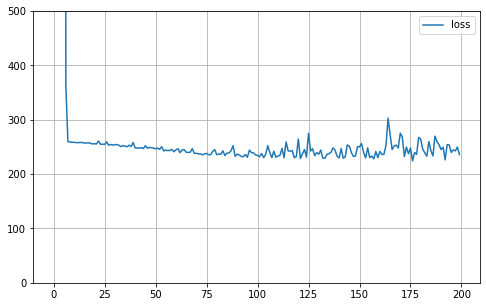

In [601]:
pd.DataFrame(history_sgd.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 500)
plt.show()

In [602]:
predictions = model.predict(X_test)

In [603]:
predictions

array([[1965.7173],
       [2127.8494],
       [2745.5623],
       [1649.857 ],
       [2654.9565],
       [1366.3184],
       [2441.3528],
       [1823.849 ],
       [2049.9424],
       [1910.529 ],
       [1965.1234],
       [1604.8387],
       [1933.1772],
       [2670.9277],
       [2362.751 ],
       [1930.3156],
       [1380.1384],
       [1515.538 ],
       [2105.4226],
       [2159.9673],
       [2157.2712],
       [1864.4708],
       [2766.2432],
       [1410.6826],
       [1379.0033],
       [1964.787 ],
       [2267.4604],
       [2445.87  ],
       [1523.6508],
       [1932.4943],
       [1613.6278],
       [1377.39  ],
       [1890.2919],
       [2085.9253],
       [1527.0746],
       [2162.4456],
       [1846.9379],
       [2537.2947],
       [2553.3271],
       [2437.4062],
       [1570.538 ],
       [1382.2997],
       [2460.3745],
       [1402.3029],
       [2379.141 ],
       [1743.0404],
       [2001.2719],
       [1983.8873],
       [1970.4977],
       [1596.0587],


# Analiza wyników

In [604]:
predictions = np.concatenate(predictions)

In [605]:
d = {'Open': open_values,
    'Close': y_test, 
     'Close_Predicted': predictions
    }
results = pd.DataFrame(data=d)

In [606]:
results.head()

,Open,Close,Close_Predicted
0,1961.39,1942.74,1965.717285
1,2125.36,2147.26,2127.849365
2,2752.97,2767.56,2745.562256
3,1642.89,1652.32,1649.857056
4,2660.63,2675.81,2654.956543


In [607]:
results['Difference'] = results['Close_Predicted'] - results['Close']

In [608]:
results.head()

,Open,Close,Close_Predicted,Difference
0,1961.39,1942.74,1965.717285,22.977285
1,2125.36,2147.26,2127.849365,-19.410635
2,2752.97,2767.56,2745.562256,-21.997744
3,1642.89,1652.32,1649.857056,-2.462944
4,2660.63,2675.81,2654.956543,-20.853457


In [609]:
results.describe()

,Open,Close,Close_Predicted,Difference
count,319.000000,319.000000,319.000000,319.000000
mean,1958.165517,1959.150502,1961.685913,2.534689
std,375.199051,374.919968,371.294983,13.786324
min,1295.730000,1304.860000,1304.385986,-62.572866
25%,1660.400000,1669.880000,1667.254761,-5.049568
50%,1984.220000,1987.660000,1988.310425,1.647739
75%,2168.810000,2170.895000,2170.759155,9.155479
max,2809.160000,2832.970000,2800.651611,44.391558


In [610]:
from sklearn import  metrics
metrics.r2_score(results['Close'], results['Close_Predicted'])

0.9986020160498689

In [611]:
print("Difference mean: ", results['Difference'].mean())
print("Difference std: ", results['Difference'].std())

Difference mean:  2.5346890459688516
Difference std:  13.786324280793163


**Dowiedzmy się ile wynosi accuracy naszego modelu w kwestii przewidywania czy kurs wzrósł czy zmalał**

Utwórzmy kolumny Up_Down oraz Up_Down_Predicted

1 będzie oznaczała, że kurs wzrósł<br>
0 kurs zmalał lub pozostał taki sam

In [612]:
results['Up_Down'] = results['Close'] - results['Open']
results['Up_Down'] = results['Up_Down'].map(lambda diff: 1 if diff > 0 else 0)

In [613]:
results['Up_Down_Predicted'] = results['Close_Predicted'] - results['Open']
results['Up_Down_Predicted'] = results['Up_Down_Predicted'].map(lambda diff: 1 if diff > 0 else 0)

In [614]:
results.head()

,Open,Close,Close_Predicted,Difference,Up_Down,Up_Down_Predicted
0,1961.39,1942.74,1965.717285,22.977285,0,1
1,2125.36,2147.26,2127.849365,-19.410635,1,1
2,2752.97,2767.56,2745.562256,-21.997744,1,0
3,1642.89,1652.32,1649.857056,-2.462944,1,1
4,2660.63,2675.81,2654.956543,-20.853457,1,0


**Utwórzmy jeszcze kolumnę wskazującą na to czy model przewidział wzrost/spadek poprawnie**

1 = model przewidział wzrost/spadek poprawnie<br>
0 = model źle przewidział wzrost/spadek

In [615]:
results['Prediction_correct'] = results['Up_Down'] - results['Up_Down_Predicted']
results['Prediction_correct'] = results['Prediction_correct'].map(lambda res: 1 if res==0 else 0)

In [616]:
results.head()

,Open,Close,Close_Predicted,Difference,Up_Down,Up_Down_Predicted,Prediction_correct
0,1961.39,1942.74,1965.717285,22.977285,0,1,0
1,2125.36,2147.26,2127.849365,-19.410635,1,1,1
2,2752.97,2767.56,2745.562256,-21.997744,1,0,0
3,1642.89,1652.32,1649.857056,-2.462944,1,1,1
4,2660.63,2675.81,2654.956543,-20.853457,1,0,0


**Usuńmy kolumny Up_Down oraz Up_Down_Predicted aby nie zaciemniać wyników**

In [617]:
results.drop(['Up_Down', 'Up_Down_Predicted'], axis=1, inplace=True)

In [618]:
results.head()

,Open,Close,Close_Predicted,Difference,Prediction_correct
0,1961.39,1942.74,1965.717285,22.977285,0
1,2125.36,2147.26,2127.849365,-19.410635,1
2,2752.97,2767.56,2745.562256,-21.997744,0
3,1642.89,1652.32,1649.857056,-2.462944,1
4,2660.63,2675.81,2654.956543,-20.853457,0


**Policzmy liczbę jedynek i podzielmy ją przez liczbę wszystkich wierszy, wynik da nam accuracy**

In [619]:
good = results['Prediction_correct'].sum()
print(good)

170


In [620]:
accuracy = good/(results.shape[0])

In [621]:
print("accuracy: ", accuracy)

accuracy:  0.5329153605015674
